In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(2, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [3]:
cnn = CNN()

In [4]:
from dataloading import load_data

In [5]:
trainloader, testloader = load_data()

In [6]:
learning_rate = .001

criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.SGD(baseline.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(cnn.parameters(), lr=learning_rate)

In [7]:
epochs = 5

In [8]:
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    epoch_losses = []
    
    for i, data in enumerate(trainloader, 0):
        inputs, target, classes = data
        
        optimizer.zero_grad()
        
        outputs = cnn(inputs)
        outputs = outputs.squeeze()
        
        loss = criterion(outputs, target.float())
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        epoch_losses.append(loss.item())
    
    epoch_loss = torch.mean(torch.tensor(epoch_losses))
    print(f'epoch: {epoch}, loss: {epoch_loss}')
    losses.append(epoch_loss)  

epoch: 0, loss: 0.7668694257736206
epoch: 1, loss: 0.48687925934791565
epoch: 2, loss: 0.3777710497379303
epoch: 3, loss: 0.3964751362800598
epoch: 4, loss: 0.29165348410606384


In [9]:
from evaluate import evaluate_model

evaluate_model(cnn, testloader)

Accuracy: 0.8149999976158142


tensor(0.8150)

In [10]:
from evaluate import evaluate_model

l = []
a = []

epochs = 30

for round in range(20):
    print('####################################################')
    print(f'Round: {round}')
    print('####################################################')
    
    model = CNN()
    
    trainloader, testloader = load_data()
    
    learning_rate = .001

    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    accs = []

    for epoch in range(epochs):
        running_loss = 0.0
        epoch_losses = []

        for i, data in enumerate(trainloader, 0):
            inputs, target, classes = data

            optimizer.zero_grad()

            outputs = model(inputs)
            outputs = outputs.squeeze()

            loss = criterion(outputs, target.float())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            epoch_losses.append(loss.item())

        epoch_loss = torch.mean(torch.tensor(epoch_losses))
        print(f'epoch: {epoch}, loss: {epoch_loss}')
        losses.append(epoch_loss) 
        
        acc = evaluate_model(model, testloader)
        accs.append(acc)
    
    l.append(losses)
    a.append(accs)

####################################################
Round: 0
####################################################
epoch: 0, loss: 0.7740035057067871
Accuracy: 0.671999990940094
epoch: 1, loss: 0.4800632894039154
Accuracy: 0.7739999890327454
epoch: 2, loss: 0.40045365691185
Accuracy: 0.8069999814033508
epoch: 3, loss: 0.34843167662620544
Accuracy: 0.7870000004768372
epoch: 4, loss: 0.30992987751960754
Accuracy: 0.8009999990463257
epoch: 5, loss: 0.22660288214683533
Accuracy: 0.8199999928474426
epoch: 6, loss: 0.1585511714220047
Accuracy: 0.8199999928474426
epoch: 7, loss: 0.07254182547330856
Accuracy: 0.8059999942779541
epoch: 8, loss: 0.09141552448272705
Accuracy: 0.8109999895095825
epoch: 9, loss: 0.1456558257341385
Accuracy: 0.8059999942779541
epoch: 10, loss: 0.04408609867095947
Accuracy: 0.8149999976158142
epoch: 11, loss: 0.014792263507843018
Accuracy: 0.8259999752044678
epoch: 12, loss: 0.004539361223578453
Accuracy: 0.8230000138282776
epoch: 13, loss: 0.0013185621937736869
Accu

epoch: 26, loss: 0.00012038925342494622
Accuracy: 0.8080000281333923
epoch: 27, loss: 0.00010906605893978849
Accuracy: 0.8119999766349792
epoch: 28, loss: 0.00010184253187617287
Accuracy: 0.8109999895095825
epoch: 29, loss: 9.543633495923132e-05
Accuracy: 0.8109999895095825
####################################################
Round: 4
####################################################
epoch: 0, loss: 0.7975243926048279
Accuracy: 0.7590000033378601
epoch: 1, loss: 0.5048618316650391
Accuracy: 0.7749999761581421
epoch: 2, loss: 0.4227074682712555
Accuracy: 0.7599999904632568
epoch: 3, loss: 0.3828088343143463
Accuracy: 0.8080000281333923
epoch: 4, loss: 0.2572404742240906
Accuracy: 0.8029999732971191
epoch: 5, loss: 0.20773404836654663
Accuracy: 0.6890000104904175
epoch: 6, loss: 0.19846707582473755
Accuracy: 0.7960000038146973
epoch: 7, loss: 0.1308615505695343
Accuracy: 0.8040000200271606
epoch: 8, loss: 0.06422798335552216
Accuracy: 0.8259999752044678
epoch: 9, loss: 0.0214597731828

epoch: 22, loss: 0.00013056177704129368
Accuracy: 0.8119999766349792
epoch: 23, loss: 0.00011703872587531805
Accuracy: 0.8130000233650208
epoch: 24, loss: 0.00011192476085852832
Accuracy: 0.8119999766349792
epoch: 25, loss: 0.00010126715642400086
Accuracy: 0.8109999895095825
epoch: 26, loss: 9.25923595787026e-05
Accuracy: 0.8119999766349792
epoch: 27, loss: 9.011708607431501e-05
Accuracy: 0.8090000152587891
epoch: 28, loss: 8.111960778478533e-05
Accuracy: 0.8109999895095825
epoch: 29, loss: 7.610568718519062e-05
Accuracy: 0.8109999895095825
####################################################
Round: 8
####################################################
epoch: 0, loss: 0.8473737835884094
Accuracy: 0.5989999771118164
epoch: 1, loss: 0.5868111252784729
Accuracy: 0.6919999718666077
epoch: 2, loss: 0.46670591831207275
Accuracy: 0.7620000243186951
epoch: 3, loss: 0.38036882877349854
Accuracy: 0.8009999990463257
epoch: 4, loss: 0.33972352743148804
Accuracy: 0.8090000152587891
epoch: 5, loss:

Accuracy: 0.828000009059906
epoch: 19, loss: 0.000820248736999929
Accuracy: 0.8299999833106995
epoch: 20, loss: 0.0005629013176076114
Accuracy: 0.8309999704360962
epoch: 21, loss: 0.0004390910908114165
Accuracy: 0.8299999833106995
epoch: 22, loss: 0.00036190965329296887
Accuracy: 0.8299999833106995
epoch: 23, loss: 0.0002871858305297792
Accuracy: 0.8320000171661377
epoch: 24, loss: 0.0002387608983553946
Accuracy: 0.8330000042915344
epoch: 25, loss: 0.0002023807173827663
Accuracy: 0.8339999914169312
epoch: 26, loss: 0.00017303189088124782
Accuracy: 0.8309999704360962
epoch: 27, loss: 0.00015301052189897746
Accuracy: 0.8320000171661377
epoch: 28, loss: 0.0001365446951240301
Accuracy: 0.8320000171661377
epoch: 29, loss: 0.00012964371126145124
Accuracy: 0.8289999961853027
####################################################
Round: 12
####################################################
epoch: 0, loss: 0.8204132318496704
Accuracy: 0.6179999709129333
epoch: 1, loss: 0.5334051847457886
Accura

Accuracy: 0.8090000152587891
epoch: 15, loss: 0.0026601096615195274
Accuracy: 0.8059999942779541
epoch: 16, loss: 0.0010993627365678549
Accuracy: 0.8080000281333923
epoch: 17, loss: 0.0005478941020555794
Accuracy: 0.8029999732971191
epoch: 18, loss: 0.0004197490052320063
Accuracy: 0.8080000281333923
epoch: 19, loss: 0.0003902680182363838
Accuracy: 0.8050000071525574
epoch: 20, loss: 0.00032998176175169647
Accuracy: 0.8050000071525574
epoch: 21, loss: 0.00027916350518353283
Accuracy: 0.8059999942779541
epoch: 22, loss: 0.0002446299185976386
Accuracy: 0.8069999814033508
epoch: 23, loss: 0.00022594985784962773
Accuracy: 0.8059999942779541
epoch: 24, loss: 0.00020646063785534352
Accuracy: 0.8050000071525574
epoch: 25, loss: 0.00017677608411759138
Accuracy: 0.8050000071525574
epoch: 26, loss: 0.000162814452778548
Accuracy: 0.8080000281333923
epoch: 27, loss: 0.00014999264385551214
Accuracy: 0.8069999814033508
epoch: 28, loss: 0.0001362927141599357
Accuracy: 0.8069999814033508
epoch: 29, los

epoch: 11, loss: 0.021081335842609406
Accuracy: 0.7960000038146973
epoch: 12, loss: 0.008775358088314533
Accuracy: 0.8159999847412109
epoch: 13, loss: 0.0024938788264989853
Accuracy: 0.8090000152587891
epoch: 14, loss: 0.0009460473665967584
Accuracy: 0.8119999766349792
epoch: 15, loss: 0.0006194348097778857
Accuracy: 0.8130000233650208
epoch: 16, loss: 0.00045847301953472197
Accuracy: 0.8109999895095825
epoch: 17, loss: 0.00037585882819257677
Accuracy: 0.8119999766349792
epoch: 18, loss: 0.0003185977693647146
Accuracy: 0.8130000233650208
epoch: 19, loss: 0.000272670469712466
Accuracy: 0.8130000233650208
epoch: 20, loss: 0.00024025150923989713
Accuracy: 0.8130000233650208
epoch: 21, loss: 0.00021322921384125948
Accuracy: 0.8140000104904175
epoch: 22, loss: 0.00018821615958586335
Accuracy: 0.8140000104904175
epoch: 23, loss: 0.00017400224169250578
Accuracy: 0.8140000104904175
epoch: 24, loss: 0.00015846399764996022
Accuracy: 0.8140000104904175
epoch: 25, loss: 0.00014262292825151235
Accu

In [11]:
aa = torch.tensor(a)

max_a, _ = torch.max(aa, dim=-1)

i = torch.argmax(max_a)

maxmax_a = torch.max(max_a)
min_a = torch.min(max_a)
std_a = torch.std(max_a)

print(min_a, maxmax_a, std_a)

tensor(0.8130) tensor(0.8400) tensor(0.0085)


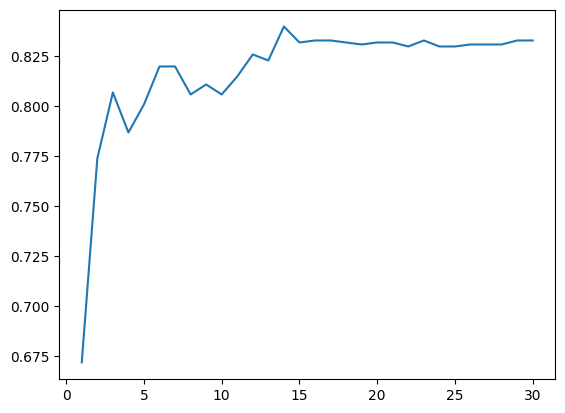

In [12]:
import matplotlib.pyplot as plt

x = range(1, 31)
y = a[i]

plt.plot(x, y)
plt.show()

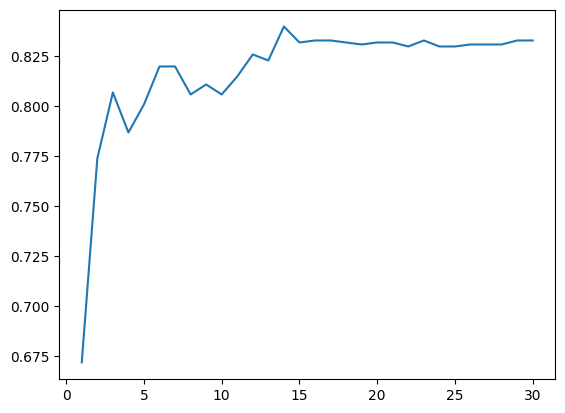

In [13]:
import matplotlib.pyplot as plt

x = range(1, 31)
y = a[i]

plt.plot(x, y)
plt.show()

In [14]:
print(torch.tensor(a[i]).tolist())
print(torch.tensor(l[i]).tolist())

[0.671999990940094, 0.7739999890327454, 0.8069999814033508, 0.7870000004768372, 0.8009999990463257, 0.8199999928474426, 0.8199999928474426, 0.8059999942779541, 0.8109999895095825, 0.8059999942779541, 0.8149999976158142, 0.8259999752044678, 0.8230000138282776, 0.8399999737739563, 0.8320000171661377, 0.8330000042915344, 0.8330000042915344, 0.8320000171661377, 0.8309999704360962, 0.8320000171661377, 0.8320000171661377, 0.8299999833106995, 0.8330000042915344, 0.8299999833106995, 0.8299999833106995, 0.8309999704360962, 0.8309999704360962, 0.8309999704360962, 0.8330000042915344, 0.8330000042915344]
[0.7740035057067871, 0.4800632894039154, 0.40045365691185, 0.34843167662620544, 0.30992987751960754, 0.22660288214683533, 0.1585511714220047, 0.07254182547330856, 0.09141552448272705, 0.1456558257341385, 0.04408609867095947, 0.014792263507843018, 0.004539361223578453, 0.0013185621937736869, 0.0008727553649805486, 0.0006811752100475132, 0.0005548828048631549, 0.0004568762378767133, 0.00038847641553